# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_efficientdet_d0' 
PRETRAINED_MODEL_NAME = 'efficientdet_d0_coco17_tpu-32'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip3 install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ddef3cdfc67b63a01fd68c1d81919a234577084b727d1d435b98f32eac64faa5
  Stored in directory: c:\users\tijoxa\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


You should consider upgrading via the 'c:\users\tijoxa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 82% [.............................................................             ] 1212416 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 fichier(s) d‚plac‚(s).
        1 fichier(s) copi‚(s).
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\proto

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
c:\users\tijoxa\appdata\local\temp\easy_install-hy72urw9\pycocotools-2.0.2\.eggs\cython-0.29.24-py3.9-win-amd64.egg\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Tijoxa\AppData\Local\Temp\easy_install-hy72urw9\pycocotools-2.0.2\pycocotools\_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
error: [WinError 5] Accès refusé: 'C:\\Users\\Tijoxa\\AppData\\Local\\Temp\\easy_install-hy72urw9\\pycocotools-2.0.2\\.eggs\\Cython-0.29.24-py3.9-win-amd64.egg\\Cython\\Compiler\\FlowControl.cp39-win_amd64.pyd'


copying build\lib\object_detection\dataset_tools\context_rcnn\create_cococameratraps_tfexample_tf2_test.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying build\lib\object_detection\dataset_tools\context_rcnn\generate_detection_data.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying build\lib\object_detection\dataset_tools\context_rcnn\generate_detection_data_tf2_test.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying build\lib\object_detection\dataset_tools\context_rcnn\generate_embedding_data.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying build\lib\object_detection\dataset_tools\context_rcnn\generate_embedding_data_tf2_test.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying build\lib\object_detection\dataset_tools\context_rcnn\__init__.py -> build\bdist.win-amd64\egg\object_detection\dataset_tools\context_rcnn
copying

Obtaining file:///C:/Users/Tijoxa/Desktop/code/maxime/Tensorflow%20Object%20Detection/TFODCourse/Tensorflow/models/research/slim
  Running setup.py develop for slim


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires Cython, which is not installed.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.6.0 requires psutil

In [11]:
!pip install tf_slim --upgrade

You should consider upgrading via the 'c:\users\tijoxa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [14]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.7: C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-15 15:01:07.198873: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-15 15:01:09.511296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1336 MB memory:  -> device: 0, name: GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1091: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.wa

In [13]:
!pip install pyyaml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires Cython, which is not installed.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.6.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.6.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.6.0 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires sacrebleu, which is not installed.
tf-models-official 2.6.0 requires sentencepiece, which is not installed.
tf-model

In [22]:
!pip uninstall tensorflow -y
!pip install tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
  Using cached tensorflow-2.6.0-cp39-cp39-win_amd64.whl (423.3 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires gin-config, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.6.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.6.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.6.0 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires sacrebleu, which is not installed.
tf-models-official 2.6.0 requires sentencepiece, which is not installed.
tf-models-official 2.6.0 requires seqeval, which is not installed.
tf-mode

In [15]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\tijoxa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.18.0
Uninstalling protobuf-3.18.0:
  Successfully uninstalled protobuf-3.18.0


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\tenacity\__init__.py", lin

  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\Tijoxa\AppData\Local\Temp\pip-uninstall-n2kkkl19\pylab.cpython-39.pyc
  Moving to c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\matplotlib-3.4.3-py3.9-nspkg.pth
   from C:\Users\Tijoxa\AppData\Local\Temp\pip-uninstall-mdf2ft3g\matplotlib-3.4.3-py3.9-nspkg.pth
  Moving to c:\users\tijoxa\appdata\local\programs\python\python39\lib\site-packages\matplotlib-3.4.3.dist-info\
   from C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\L

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\tijoxa\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tijoxa\\AppData\\Local\\Temp\\pip-install-1cbmlofn\\matplotlib_1a6eb5a766744557be19fce13ac400d6\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tijoxa\\AppData\\Local\\Temp\\pip-install-1cbmlofn\\matplotlib_1a6eb5a766744557be19fce13ac400d6\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tijoxa\AppData\Local\Temp\pip-wheel-0x_b464v'
       cwd: C:\Users\Tijoxa\AppData\Local\Temp\pip-install-1cbmlofn\matplotlib_1a6eb5a766744557be19fce13ac400d6\
  Complete output (577 lines):
  
  Edit setup.cfg to change the build options; suppress output with 

  copying lib\matplotlib\backends\backend_qt4agg.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_qt4cairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_qt5.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_qt5agg.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_qt5cairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_svg.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_template.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_tkagg.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_tkcairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\backend_webagg.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying 

In [17]:
import object_detection


  copying lib\matplotlib\mpl-data\images\home.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\move.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\stylelib\fast.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Helvetica-BoldOblique.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\pdfcorefonts
  copying lib\matplotlib\mpl-data\images\qt4_editor_options_large.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\stylelib\seaborn-darkgrid.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\fonts\afm\pzdr.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\fonts\afm\pagk8a.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\stylelib\seaborn-whitegrid.m

ModuleNotFoundError: No module named 'object_detection'

In [ ]:
!pip list

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# 2. Create Label Map

In [ ]:
labels = [{'name':'Levée', 'id':1}, {'name':'Tallage', 'id':2}, {'name':'Epi', 'id':3}, {'name':'Moisson', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
!pip install pytz

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [18]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [19]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "C:\Users\Tijoxa\Desktop\code\maxime\Tensorflow Object Detection\TFODCourse\Tensorflow\scripts\generate_tfrecord.py", line 61, in <module>
    label_map = label_map_util.load_labelmap(args.labels_path)
  File "C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\label_map_util.py", line 168, in load_labelmap
    label_map_string = fid.read()
  File "C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 122, in read
    return self._prepare_value(self._read_buf.read(length))
  File "C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 94, in _prepare_value
    return compat.as_str_any(val)
  File "C:\Users\Tijoxa\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\compat.py", line 139, in as_str_any
    return as_str(value

# 4. Copy Model Config to Training Folder

In [20]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 fichier(s) copi‚(s).


# 5. Update Config For Transfer Learning

In [21]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

ModuleNotFoundError: No module named 'object_detection'

In [68]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [35]:
config

{'model': center_net {
   num_classes: 90
   feature_extractor {
     type: "resnet_v1_101_fpn"
   }
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 512
       max_dimension: 512
       pad_to_max_dimension: true
     }
   }
   object_detection_task {
     task_loss_weight: 1.0
     offset_loss_weight: 1.0
     scale_loss_weight: 0.10000000149011612
     localization_loss {
       l1_localization_loss {
       }
     }
   }
   object_center_params {
     object_center_loss_weight: 1.0
     classification_loss {
       penalty_reduced_logistic_focal_loss {
         alpha: 2.0
         beta: 4.0
       }
     }
     min_box_overlap_iou: 0.699999988079071
     max_box_predictions: 100
   }
 },
 'train_config': batch_size: 128
 data_augmentation_options {
   random_horizontal_flip {
   }
 }
 data_augmentation_options {
   random_crop_image {
     min_aspect_ratio: 0.5
     max_aspect_ratio: 1.7000000476837158
     random_coef: 0.25
   }
 }
 data_augmentation_optio

In [69]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [70]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [71]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [72]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [73]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [74]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficientdet_d0 --pipeline_config_path=Tensorflow\workspace\models\my_efficientdet_d0\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [75]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [76]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficientdet_d0 --pipeline_config_path=Tensorflow\workspace\models\my_efficientdet_d0\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_efficientdet_d0


In [81]:
tf.__version__

'2.6.0'

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [39]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [40]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [41]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [45]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'markus-winkler-05UWfR31EhQ-unsplash.jpg')

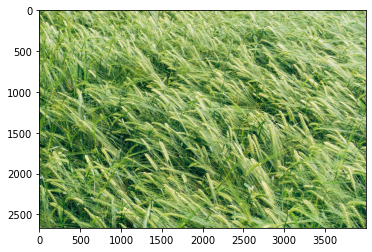

In [46]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')